In [1]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 4.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control
import control.matlab

In [38]:
# Define transfer function of the system
s = control.tf('s')

In [39]:
def Nyquist_Analysis(Ks, Gs, Hs):
    KsGs = control.series(Ks, Gs)

    # Create open-loop system
    cl_sys = control.series(KsGs, Hs)

    plt.figure(1)
    control.nyquist_plot(cl_sys)

    # Obtenha a resposta Nyquist
    responses = control.nyquist_response(cl_sys)
    N = responses.count
    print("Número Envolvimentos no Sentido Anti-Horário: " + str(N))

    plt.figure(2)
    roots, gains = control.root_locus_map(cl_sys)
    control.root_locus(cl_sys)

    Poles = control.poles(Gs)
    print("System Poles: ", Poles)
    P = sum(i > 0 for i in Poles)
    print("Número de Polos com Parte Real Positiva: " + str(P))

    Z = P - N
    print("Critério de Estabilidade de Nyquist (Z = P - N): " + str(Z))
    if Z>=1:
        print("Sistema Instável Z>=1")
    else:
        print("Sistema Estável Z<1")

    # Analisando em Malha Fechada
    # Create closed-loop system
    cl_sys = control.feedback(KsGs, Hs, sign=-1)

    # Simulate step response
    t, y = control.step_response(cl_sys)

    # Plot step response
    plt.figure(3)
    plt.plot(t, y)
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    plt.title('System step response ')
    plt.grid()
    plt.show()

# Nyquist Analysis

In [40]:
Ks = 1

In [44]:
#Caso 1
#Gs = 1/(s+2)

#Caso 2
#Gs = 1/(s-2)

#Caso 3
Gs = 1/(s-1/2)

#Caso 4
#Gs = ((s+5)*(s+3))/((s-2)*(s-4))

In [45]:
Hs = 1

Número Envolvimentos no Sentido Anti-Horário: 0
System Poles:  [-2.+0.j]
Número de Polos com Parte Real Positiva: 0
Critério de Estabilidade de Nyquist (Z = P - N): 0
Sistema Estável Z<1


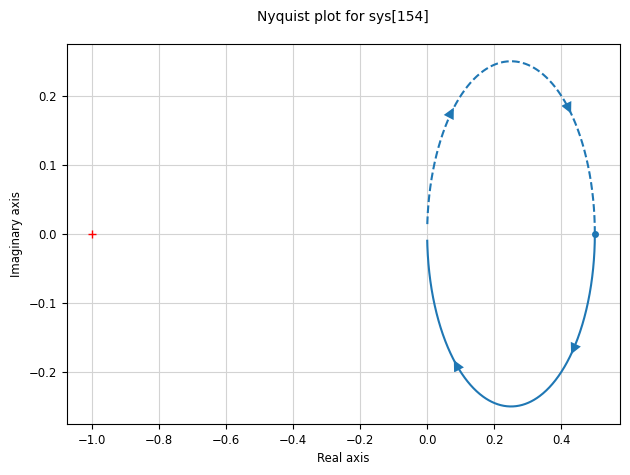

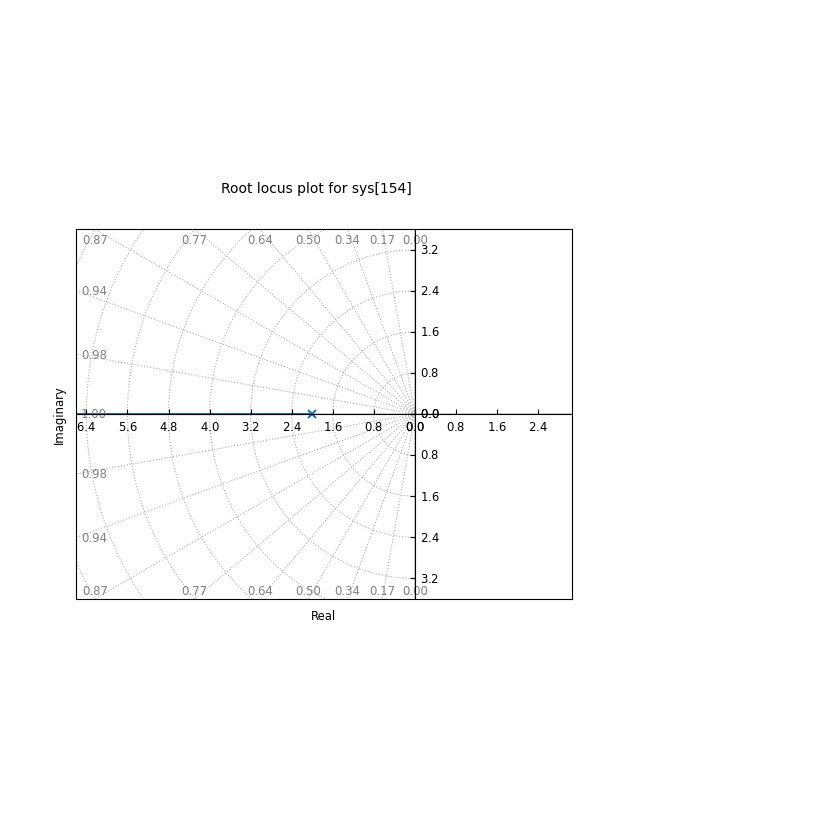

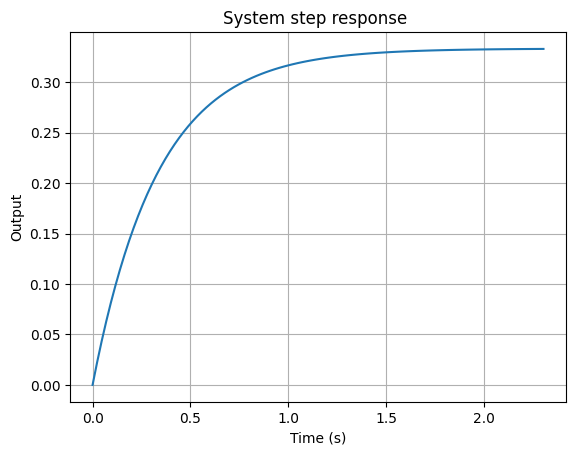

In [46]:
Nyquist_Analysis(Ks, Gs, Hs)